# Audio Enhancer Using Spectral Painting

In [24]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

## Variables

In [25]:
# Example usage
audio_path = "./Test/Test.wav"  # Replace with your audio file path

In [26]:
output_path = "./Test/enhanced_vocals_harmonic.wav"

In [27]:
method = "harmonic"  # Choose "harmonic" or "reconstruction"


In [28]:
intensity = 1.0

In [29]:
# enhance_vocals(audio_path, output_path, method)
# print("Vocals enhanced! Output saved to", output_path)


## Processing

In [30]:
# Load Audio
y, sr = librosa.load(audio_path, dtype=np.float32)

In [31]:
# Ensure intensity is between 0 and 1
intensity = np.clip(intensity, 0.0, 0.5) # 0.0 - 1.0 = Full Effect 

In [32]:
# Vocal Adjustment
y_harmonic = librosa.effects.harmonic(y)
mask = np.abs(librosa.stft(y_harmonic)) / (np.abs(librosa.stft(y)) + 1e-16)

In [33]:
# Adjust mask based on intensity
mask = 1 + (mask - 1) * intensity

In [34]:
# Apply mask and reconstruct audio
stft = librosa.stft(y)
stft_enhanced = stft * mask
y_enhanced = librosa.istft(stft_enhanced)

In [35]:
# Save the modified audio
sf.write(output_path, y_enhanced, sr)

In [36]:
print("Vocals enhanced! Output saved to", output_path)

Vocals enhanced! Output saved to ./Test2/enhanced_vocals_harmonic.wav


## Performance

### Input

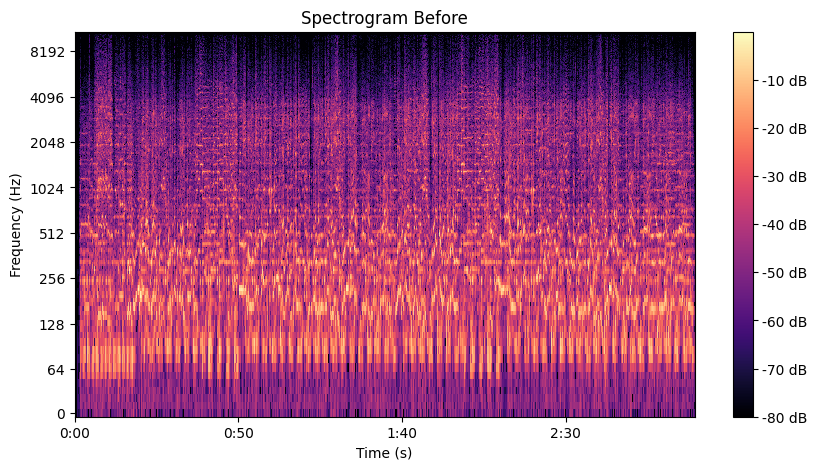

In [37]:
# Load audio file 
audio_file = audio_path 
y, sr = librosa.load(audio_file) 
 
# Calculate and plot spectrogram 
D = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(D), ref=np.max) 
plt.figure(figsize=(10, 5)) 
librosa.display.specshow(S_db, x_axis='time', y_axis='log') 
plt.colorbar(format='%+2.0f dB') 
plt.title('Spectrogram Before') 
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)') 
plt.show() 

### Output

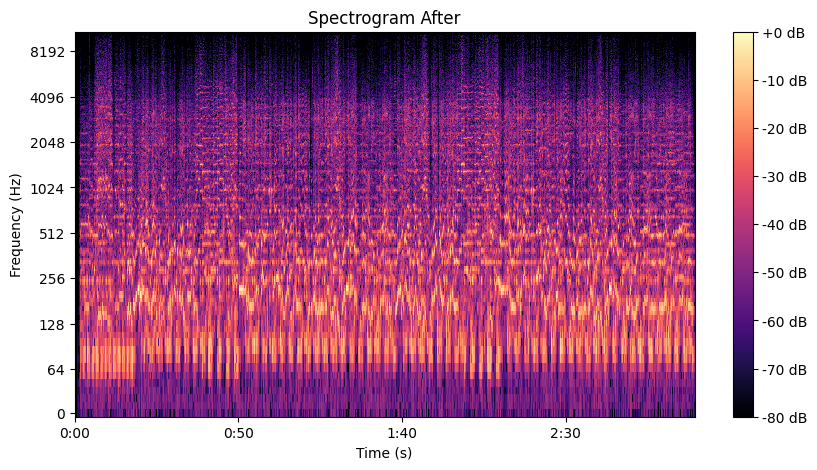

In [38]:
# Load audio file 
audio_file = output_path 
y, sr = librosa.load(audio_file) 

# Calculate and plot spectrogram 
D = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(D), ref=np.max) 
plt.figure(figsize=(10, 5)) 
librosa.display.specshow(S_db, x_axis='time', y_axis='log') 
plt.colorbar(format='%+2.0f dB') 
plt.title('Spectrogram After') 
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)') 
plt.show() 